In [15]:
import tensorflow as tf
#Vers. 0.12.1
#print(tf.__version__)
import sys
#Should be above 3.5
#print (sys.versio£n)     

import cv2
import numpy as np
import os
import glob
import pickle

import matplotlib.image as mpimg
from skimage import color

import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

from Helpers import get_files, load_image, separate_imgs, get_next_batch_from_disk_RGB, get_next_batch_from_disk_RGB_Nocrop, get_next_batch_from_disk_HSV, get_next_batch_from_disk_Nocrop_HSV

# Colorize

In [16]:
def colorize_TF(gray_images):
    with tf.Session() as sess:
        model_path = "./ghibli_HSV_norm/model.ckpt"
        save_dir = 'ghibli_HSV_norm'

        new_saver = tf.train.import_meta_graph(save_dir + "/model.ckpt.meta")
        new_saver.restore(sess, save_dir + '/model.ckpt')

        # tf.get_collection() returns a list. In this example we only want the
        # first one.
        colored_images = tf.get_collection('color_image')[0]

        images = np.array(gray_images)
        
        return sess.run(colored_images, feed_dict={"x:0": images, "keep_prob:0" :1, "is_training:0" : False},)

In [17]:
images_list = get_files("../Data/Old/*", '*.jpg')
batch_size = 15

gray, img = get_next_batch_from_disk_HSV(images_list, batch_size, crop_size=224)

colored = colorize_TF(gray)


In [18]:
img.shape

(15, 224, 224, 2)

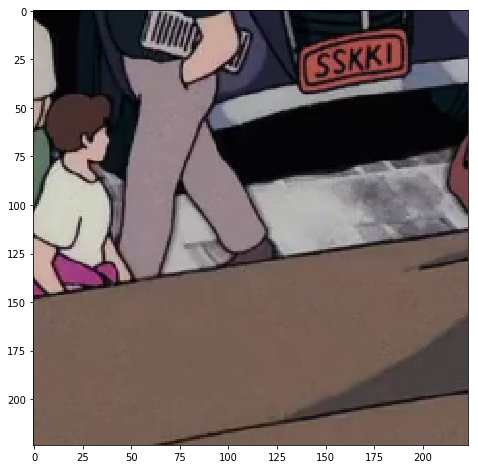

In [19]:
h = img[0][..., 0] * 179
s = img[0][..., 1] * 255
v = gray[0][..., 0] * 255

hsv = np.dstack((h,s,v))
rgb = cv2.cvtColor(hsv.astype("uint8"), cv2.COLOR_HSV2RGB);
plt.imshow(rgb)

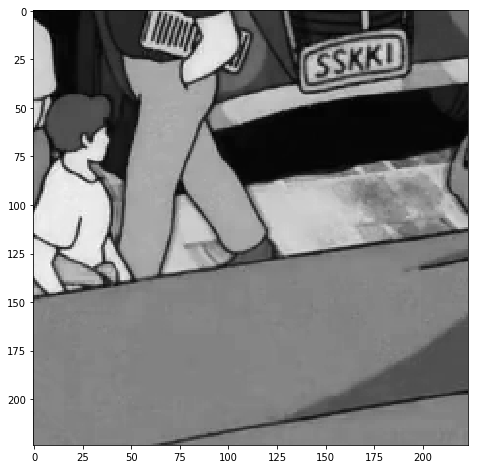

In [20]:
plt.imshow(v, cmap="gray")


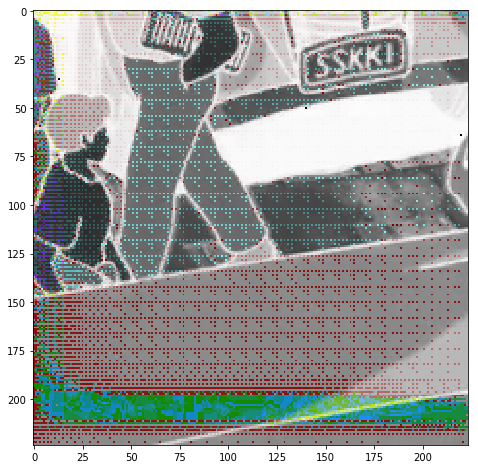

In [21]:
h2 = colored[0][..., 0] * 179
s2 = colored[0][..., 1] * 255
v2 = gray[0][..., 0] * 255

hsv2 = np.dstack((h2,s2,v2))

rgb2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB)
plt.imshow(rgb2)

In [22]:
h2

array([[ 179.,  179.,  179., ...,  179.,  179.,  179.],
       [ 179.,  179.,    0., ...,  179.,  179.,  179.],
       [ 179.,  179.,  179., ...,  179.,  179.,  179.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32)

In [23]:
h

array([[   5.        ,    5.        ,  165.        , ...,  123.99999237,
         123.99999237,  123.99999237],
       [   7.        ,    7.        ,   11.        , ...,  123.99999237,
         123.99999237,  123.99999237],
       [   7.        ,    7.        ,   11.        , ...,  123.99999237,
         123.99999237,  123.99999237],
       ..., 
       [  11.        ,   11.        ,   11.        , ...,   11.        ,
          11.        ,   11.        ],
       [  11.        ,   11.        ,   11.        , ...,   11.        ,
          11.        ,   11.        ],
       [  11.        ,   11.        ,   11.        , ...,   11.        ,
          11.        ,   11.        ]], dtype=float32)

In [28]:
h2[200]

array([ 179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,  179.,
        179.,  179.,